# DDOS attack Detection
### Creating a platform that can detect DDOS attacks


In [40]:
# installing modules
! pip install pandas numpy matplotlib seaborn scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [42]:
# reading Data

# df=pd.read_csv(url)

df=pd.read_csv("dataset_sdn.csv")
df

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


## I. Data Preprocessing

In [43]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [44]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [45]:
# column names
column_names= df.columns
column_names

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

Text(0, 0.5, 'Count')

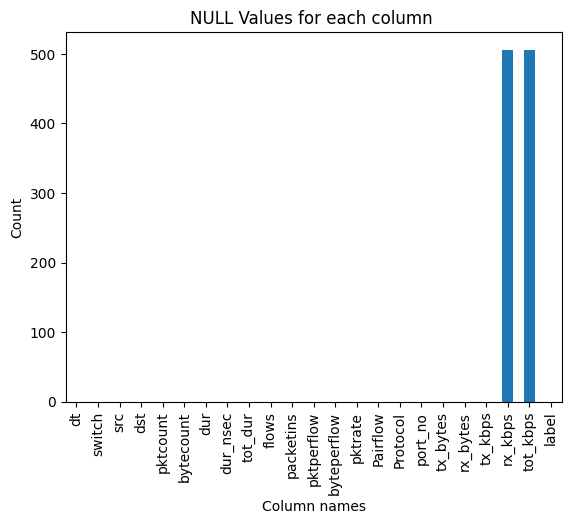

In [46]:
# Null values sum 
df.isnull().sum().plot.bar()
plt.title("NULL Values for each column ")
plt.xlabel("Column names")
plt.ylabel("Count")

In [47]:
# Dropping rows having null values
df=df.dropna()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103839 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  int64  
 1   switch       103839 non-null  int64  
 2   src          103839 non-null  object 
 3   dst          103839 non-null  object 
 4   pktcount     103839 non-null  int64  
 5   bytecount    103839 non-null  int64  
 6   dur          103839 non-null  int64  
 7   dur_nsec     103839 non-null  int64  
 8   tot_dur      103839 non-null  float64
 9   flows        103839 non-null  int64  
 10  packetins    103839 non-null  int64  
 11  pktperflow   103839 non-null  int64  
 12  byteperflow  103839 non-null  int64  
 13  pktrate      103839 non-null  int64  
 14  Pairflow     103839 non-null  int64  
 15  Protocol     103839 non-null  object 
 16  port_no      103839 non-null  int64  
 17  tx_bytes     103839 non-null  int64  
 18  rx_bytes     103839 non-null 

In [49]:
# Getting unique destination 
uniq_dest=df['dst'].unique()
total_dst=len(uniq_dest)
print("Total destination : ", total_dst)
print("Different destination : ",uniq_dest)

Total destination :  18
Different destination :  ['10.0.0.8' '10.0.0.7' '10.0.0.3' '10.0.0.5' '10.0.0.10' '10.0.0.13'
 '10.0.0.1' '10.0.0.11' '10.0.0.2' '10.0.0.4' '10.0.0.9' '10.0.0.6'
 '10.0.0.14' '10.0.0.15' '10.0.0.12' '10.0.0.16' '10.0.0.17' '10.0.0.18']


Text(0.5, 1.0, 'Traffic for normal and Malicious traffic')

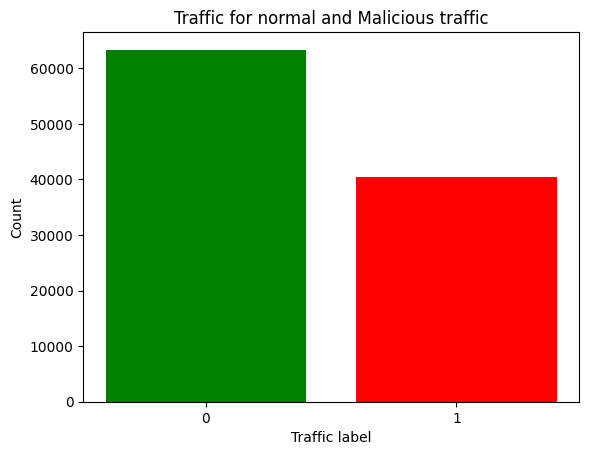

In [50]:
# Doing analysis for malicious and normal traffic 
gp=df.groupby('label')['label'].count()
plt.bar(list(gp.index),list(gp.values),color=['g','r'])
plt.xticks(list(gp.index))
plt.xlabel("Traffic label")
plt.ylabel("Count")
plt.title("Traffic for normal and Malicious traffic")

Text(0.5, 1.0, 'Attack and Normal traffic ')

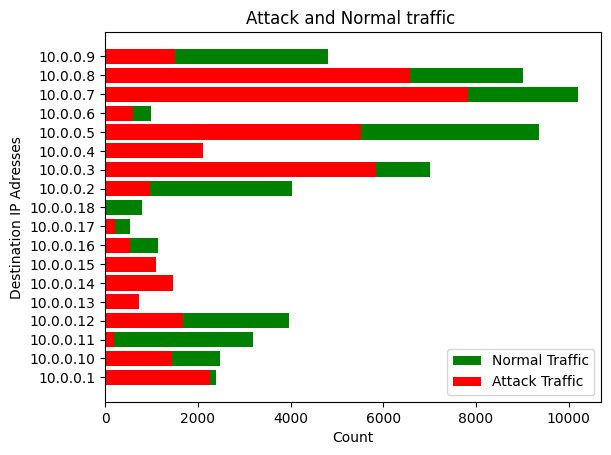

In [51]:
ip_addr=df[df['label']==0].groupby('dst').count()['label'].index
normal_traffic=df.groupby(['dst','label']).size().unstack().fillna(0)[0]
attack_traffic=df.groupby(['dst','label']).size().unstack().fillna(0)[1]
plt.barh(ip_addr,normal_traffic,color='g', label='Normal Traffic')
plt.barh(ip_addr,attack_traffic,color='r', label='Attack Traffic')
plt.legend()
plt.xlabel("Count")
plt.ylabel("Destination IP Adresses")
plt.title("Attack and Normal traffic ")

In [52]:
# Columns containing object(string) type data
# Port no column also does not do much so ignoring it also
object_col= list(df.select_dtypes(include=['object']).columns)
object_col=object_col+['port_no']
print(object_col)
data=df.drop(columns=object_col)

# seperating data based on protocol
#udp_df = df[df['Protocol']=='UDP'].drop(columns=object_col)
#tcp_df = df[df['Protocol']=='TCP'].drop(columns=object_col)
#icmp_df = df[df['Protocol']=='ICMP'].drop(columns=object_col)
#icmp_df

['src', 'dst', 'Protocol', 'port_no']


## II. Feature Selection

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import preprocessing

In [54]:
y=data['label']
x=data.drop(['label'],axis =1)
x_train, x_test , y_train, y_test=train_test_split(x,y,random_state = 104, test_size = 0.2)
train_data = pd.concat([x_train,y_train], axis=1,join='inner')

correl=train_data.corr(numeric_only=True)['label'].sort_values()
correl.drop('label',inplace=True)

In [55]:
selected=correl.loc[abs(correl)>0.08]
attr_selected=list(selected.index)
print(attr_selected)

['flows', 'dt', 'tot_dur', 'dur', 'pktperflow', 'pktrate', 'bytecount', 'pktcount']


#### Normalization

In [56]:
norm_x_train_data =(x_train.select_dtypes(include=['float64','int64'])-x_train.min(numeric_only=True))
norm_x_test_data =(x_test.select_dtypes(include=['float64','int64'])-x_train.min(numeric_only=True))
norm_x_train_data=preprocessing.scale(norm_x_train_data[attr_selected])
norm_x_test_data=preprocessing.scale(norm_x_test_data[attr_selected])

norm_x_train_data.shape
y_train.shape

G:\ML Python Installation\Lib\site-packages\sklearn\preprocessing\_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
G:\ML Python Installation\Lib\site-packages\sklearn\preprocessing\_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


(83071,)

#### Training Individual Model

In [57]:
train_x, val_x,train_y,val_y=train_test_split(norm_x_train_data,y_train,stratify=y_train,test_size=0.2,random_state=42)

In [77]:
nb = GaussianNB()
nb.fit(norm_x_train_data,y_train)
nb.score(norm_x_test_data, y_test)*100

62.66852850539292

#### KNN

In [78]:
knn = KNeighborsClassifier()
knn.fit(norm_x_train_data,y_train)
knn.score(norm_x_test_data,y_test)*100

99.28255007704159

In [79]:
svc = SVC()
svc.fit(norm_x_train_data,y_train)
svc.score(norm_x_test_data,y_test)*100

93.19626348228043

In [80]:
model1 = GaussianNB()
model1.fit(norm_x_train_data, y_train)

GaussianNB()

In [81]:
model2 = KNeighborsClassifier()
model2.fit(norm_x_train_data, y_train)

KNeighborsClassifier()

In [82]:
model3 = SVC()
model3.fit(norm_x_train_data, y_train)

SVC()

In [83]:
y_pred1 = model1.predict(norm_x_test_data)
y_pred2 = model2.predict(norm_x_test_data)
y_pred3 = model3.predict(norm_x_test_data)

In [84]:
ensemble_X = pd.DataFrame({'NB': y_pred1, 'KNN': y_pred2, 'SVM' : y_pred3})
ensemble_y = y_test

In [85]:
ensemble = RandomForestClassifier()
ensemble.fit(ensemble_X, ensemble_y)

RandomForestClassifier()

In [86]:
y_pred = ensemble.predict(ensemble_X)

In [87]:
accuracy = accuracy_score(ensemble_y,y_pred)

print('Accuracy:', accuracy*100)

Accuracy: 99.28255007704159


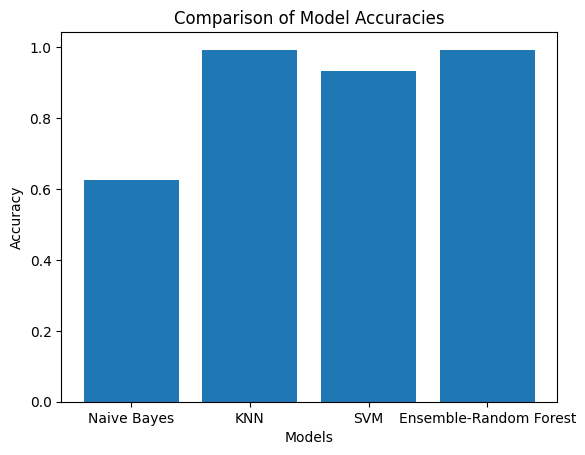

In [89]:
model_names = ['Naive Bayes', 'KNN', 'SVM', 'Ensemble-Random Forest']

accuracies = [nb.score(norm_x_test_data, y_test),
	      knn.score(norm_x_test_data, y_test),
	      svc.score(norm_x_test_data, y_test),
	      accuracy]

plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()

AUC - Naive Bayes: 0.7106030184849847
AUC - K-Nearest Neighbors: 0.9995684182147081
AUC - Support Vector Machine: 0.9858926220365638


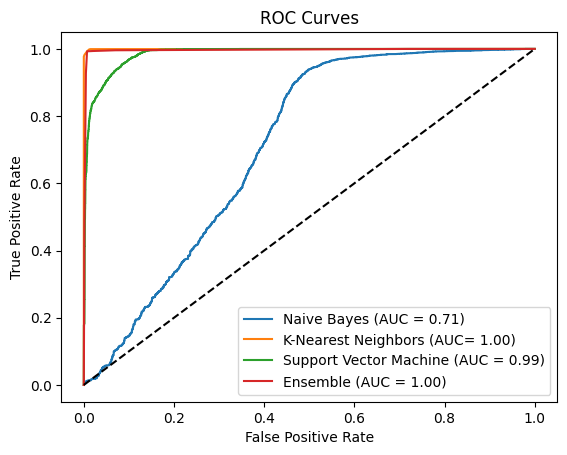

In [99]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the predicted probabilities for each model
y_pred_proba1 = model1.predict_proba(norm_x_test_data) [:, 1]
y_pred_proba2 = model2.predict_proba(norm_x_test_data) [:, 1]
y_pred_decision3 = model3.decision_function(norm_x_test_data)
y_pred_proba_ensemble = ensemble.predict_proba(ensemble_X) [:, 1]

#Calculate the False Positive Rate (fpr) and True Positive Rate (tpr) for each model
fpr1, tpr1, _ = roc_curve (y_test, y_pred_proba1)
fpr2, tpr2, _ = roc_curve (y_test, y_pred_proba2)
fpr3, tpr3, _ = roc_curve (y_test, y_pred_decision3)
fpr_ensemble, tpr_ensemble, _ = roc_curve (ensemble_y, y_pred_proba_ensemble)


#Calculate the AUC for each model
auc1 = roc_auc_score(y_test, y_pred_proba1)
auc2 = roc_auc_score(y_test, y_pred_proba2)
auc3= roc_auc_score(y_test, y_pred_decision3)
auc_ensemble = roc_auc_score(ensemble_y, y_pred_proba_ensemble)

#Plot the ROC curves
plt.plot(fpr1, tpr1, label='Naive Bayes (AUC = {:.2f})'.format(auc1))
plt.plot(fpr2, tpr2, label='K-Nearest Neighbors (AUC= {:.2f})'.format(auc2))
plt.plot(fpr3, tpr3, label='Support Vector Machine (AUC = {:.2f})'.format(auc3))
plt.plot(fpr_ensemble, tpr_ensemble, label='Ensemble (AUC = {:.2f})'.format(auc_ensemble))
plt.plot([0, 1], [0, 1], 'k--') # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()

#Save the figure
plt.savefig('roc_curves.png')

#Print the AUC values
print('AUC - Naive Bayes:', auc1)
print('AUC - K-Nearest Neighbors:', auc2)
print('AUC - Support Vector Machine:', auc3)
#print('AUC - Ensemble Random Forest:', auc_ensemble)